In [1]:
import torch
import torch.nn as nn
import numpy as np
import os

In [2]:
from star.pytorch.star import STAR

In [3]:
num_betas = 300
batch_size=1
poses = torch.FloatTensor(np.zeros((batch_size,72)))
betas = torch.FloatTensor(np.random.normal(loc=0.0, scale=1.0, size=(batch_size,num_betas)))
#betas = ~~~ np.normal
trans = torch.FloatTensor(np.zeros((batch_size,3)))

star_ = STAR(gender='female',num_betas=num_betas)
print(poses.shape[0])
x = star_.forward(pose=poses , betas=betas , trans=trans)
shaped = x.v_shaped[-1, :, :]
print(shaped)
print(shaped.type)
print(shaped.shape)
print(betas)

1
tensor([[ 0.0461,  0.5155,  0.0855],
        [ 0.0407,  0.5020,  0.0953],
        [ 0.0520,  0.4967,  0.0865],
        ...,
        [-0.0752,  0.4488, -0.0030],
        [-0.0755,  0.4507, -0.0017],
        [-0.0784,  0.4488,  0.0012]])
<built-in method type of Tensor object at 0x111b73fb0>
torch.Size([6890, 3])
tensor([[ 1.9746, -0.0048, -0.9991,  1.1712,  0.9901,  0.3283,  0.3957,  0.2775,
         -0.2174,  0.3223,  0.4642,  0.2729, -0.1141, -0.1164, -0.9683, -0.2802,
          1.8617,  1.4883, -0.2817,  0.8383, -0.5092, -0.8441,  0.3147,  0.1233,
          0.0169,  0.5508,  0.8135,  1.4809,  0.6266,  1.8817,  1.7441, -1.2072,
          1.6177, -0.1188,  1.9010,  0.5766, -0.6650, -0.7731, -0.2172,  0.8517,
          1.1724,  0.0766, -1.4810, -0.3245,  1.3916,  1.9060, -0.2237, -1.1536,
          0.2010, -0.5844, -1.8243, -1.8896, -0.1666,  0.4256,  0.6343, -1.0038,
         -0.0924, -0.5430,  0.0240,  1.3116,  0.6404, -1.1512, -0.1775, -1.0488,
          0.2205, -2.1607,  0.8987,  

In [4]:
shaped.numpy()[:, 1]

array([0.51547796, 0.50197774, 0.4967428 , ..., 0.44882414, 0.45073295,
       0.44882548], dtype=float32)

In [5]:
x_point = []
y_point = []
z_point = []
for i in range (6890):
    line = x[0][i]
    x_point.append(line[0].item())
    y_point.append(line[1].item())
    z_point.append(line[2].item())

print(x_point)
print(y_point)
print(z_point)

[0.046119071543216705, 0.040668174624443054, 0.05199549347162247, 0.05812620371580124, 0.04852496087551117, 0.03808433562517166, 0.05982937663793564, 0.06565004587173462, 0.06704918295145035, 0.07149702310562134, 0.0706324502825737, 0.06506549566984177, 0.0664820745587349, 0.06045529991388321, 0.06250131130218506, 0.06676215678453445, 0.026619944721460342, 0.03214007616043091, 0.036413490772247314, 0.029979893937706947, 0.017245668917894363, 0.018397687003016472, 0.013538403436541557, 0.013308255933225155, 0.020780302584171295, 0.02640574611723423, 0.021912191063165665, 0.019743232056498528, 0.0161177609115839, 0.017824498936533928, 0.014657416380941868, 0.013200568966567516, 0.019145295023918152, 0.01956472173333168, 0.01701328717172146, 0.01559279765933752, 0.016526807099580765, 0.013680664822459221, 0.009533626958727837, 0.010289053432643414, 0.04310411959886551, 0.03811412677168846, 0.032180193811655045, 0.03698486462235451, 0.016637012362480164, 0.019305333495140076, 0.01982067339

(-2.0, 2.0)

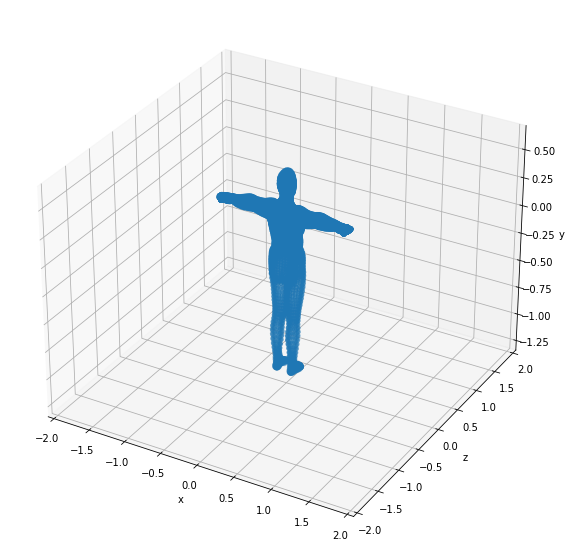

In [6]:
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(x_point, z_point, y_point, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')

plt.xlim(-2,2)
plt.ylim(-2,2)
#plt.zlim(-2,2)

#open3d

In [7]:
import pickle
 
with open('foot_f.obj', 'rb') as file:    # james.p 파일을 바이너리 읽기 모드(rb)로 열기
    foot_f = pickle.load(file)

In [8]:
foot_v_index=[]
for i in range(len(foot_f)):
    if (foot_f[i][0][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][0][0]-1)
    if (foot_f[i][1][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][1][0]-1)
    if (foot_f[i][2][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][2][0]-1)

print(len(foot_v_index))
print(foot_v_index)

251
[3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393,

In [9]:
foot_v = []
for i in range(len(foot_v_index)):
    foot_v.append(shaped[foot_v_index[i]])
    
print(len(foot_v))


251


In [10]:
x_=[]
y_=[]
z_=[]
for i in range(len(foot_v)):
    if (foot_v[i][1].item()<1 ) :
        x_.append(foot_v[i][0].item())
        y_.append(foot_v[i][1].item())
        z_.append(foot_v[i][2].item())

(-0.1, 0.2)

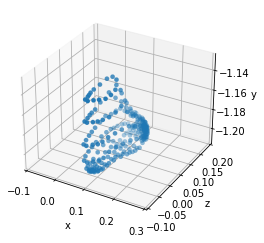

In [11]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_, z_, y_, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
plt.xlim(-0.1,0.3)
plt.ylim(-0.1,0.2)

In [12]:
thefile = open('test2.obj', 'w')
for item in shaped:
  thefile.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in foot_f:
  thefile.write("f {0}// {1}// {2}//\n".format(item[0][0],item[1][0],item[2][0]))  

thefile.close()

'''for item in foot_f:
  thefile.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0],item[1],item[2]))  '''

'for item in foot_f:\n  thefile.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0],item[1],item[2]))  '

In [13]:
from obj2html import obj2html
from IPython.display import display, HTML

obj_path = 'test1.obj'

camera={
  "fov": 15,
  "aspect": 2,
  "near": 0.1,
  "far": 100,
  "pos_x": 0.4,
  "pos_y": -2,
  "pos_z": 0.05,
  "orbit_x": 0,
  "orbit_y": 20,
  "orbit_z": 0,
}
light={
  "color": "0xFFFFFF",
  "intensity": 0.5,
  "pos_x": 0.4,
  "pos_y": -1.075,
  "pos_z": 0.05,
  "target_x": 0,
  "target_y": 0,
  "target_z": 0,
}
obj_options={
  "scale_x": 10,
  "scale_y": 10,
  "scale_z": 10,
}

obj2html(obj_path, 'index.html', camera, light, obj_options)

display(HTML('index.html'))